In [1]:
import numpy
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel("car.xlsx")
df=df.dropna(thresh=2) 
df=df.drop(['Car Model','Age(yrs)'],axis="columns")
df


,Mileage,Sell Price($)
1,69000.0,18000.0
3,35000.0,34000.0
5,57000.0,26100.0
7,22500.0,40000.0
9,46000.0,31500.0
11,59000.0,29400.0
13,52000.0,32000.0
15,72000.0,19300.0
17,91000.0,12000.0
19,67000.0,22000.0


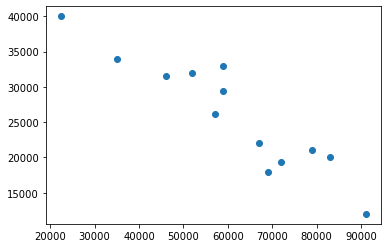

In [3]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
pred=km.fit_predict(df[['Sell Price($)','Mileage']])

In [6]:
df['cluster']=pred
df

,Mileage,Sell Price($),cluster
1,69000.0,18000.0,1
3,35000.0,34000.0,2
5,57000.0,26100.0,0
7,22500.0,40000.0,2
9,46000.0,31500.0,0
11,59000.0,29400.0,0
13,52000.0,32000.0,0
15,72000.0,19300.0,1
17,91000.0,12000.0,1
19,67000.0,22000.0,1


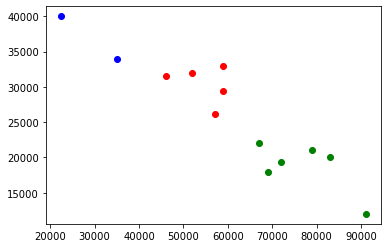

In [7]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Mileage'],df1['Sell Price($)'],color='red')
plt.scatter(df2['Mileage'],df2['Sell Price($)'],color='green')
plt.scatter(df3['Mileage'],df3['Sell Price($)'],color='blue')

In [8]:
scaler=MinMaxScaler()
scaler.fit(df[['Sell Price($)']])
df['Sell Price($)']=scaler.transform(df[['Sell Price($)']])
df

,Mileage,Sell Price($),cluster
1,69000.0,0.214286,1
3,35000.0,0.785714,2
5,57000.0,0.503571,0
7,22500.0,1.000000,2
9,46000.0,0.696429,0
11,59000.0,0.621429,0
13,52000.0,0.714286,0
15,72000.0,0.260714,1
17,91000.0,0.000000,1
19,67000.0,0.357143,1


In [9]:
km=KMeans(n_clusters=3)
pred=km.fit_predict(df[['Sell Price($)','Mileage']])
pred

array([0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2])

In [10]:
df['ncluster']=pred
df

,Mileage,Sell Price($),cluster,ncluster
1,69000.0,0.214286,1,0
3,35000.0,0.785714,2,1
5,57000.0,0.503571,0,2
7,22500.0,1.000000,2,1
9,46000.0,0.696429,0,2
11,59000.0,0.621429,0,2
13,52000.0,0.714286,0,2
15,72000.0,0.260714,1,0
17,91000.0,0.000000,1,0
19,67000.0,0.357143,1,0


No handles with labels found to put in legend.


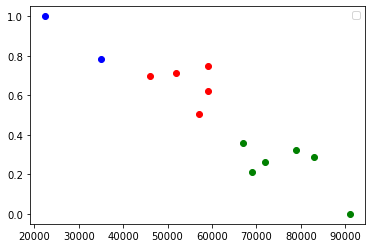

In [11]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1['Mileage'],df1['Sell Price($)'],color='red')
plt.scatter(df2['Mileage'],df2['Sell Price($)'],color='green')
plt.scatter(df3['Mileage'],df3['Sell Price($)'],color='blue')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple")
plt.legend()

In [12]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Mileage','Sell Price($)']])
    sse.append(km.inertia_)
    

In [13]:
sse

[4417076924.057411,
 1582761904.9836612,
 628158333.4757164,
 290658333.4672789,
 180583333.4463765,
 108000000.10323766,
 41333333.37513393,
 23333333.37497449,
 12666666.707891155]

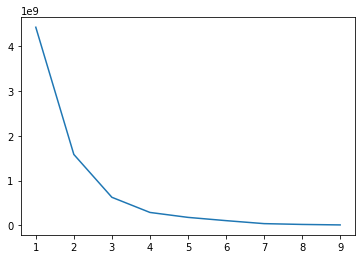

In [14]:
plt.plot(k_range,sse)

In [15]:
dff=pd.read_csv("titanic.csv")
dff.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
dff=dff.drop(['PassengerId','Name','SibSp','Parch','Ticket',"Cabin",'Embarked'],axis='columns')

In [17]:
dff.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [18]:
target=dff['Survived']
inputs=dff.drop(['Survived'],axis='columns')

In [19]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
inputs=pd.concat([inputs,dummies],axis="columns")

inputs

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [21]:
inputs=inputs.drop(['Sex'],axis='columns')

In [22]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [23]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [24]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [25]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [27]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [28]:
model.fit(x_train,y_train)

GaussianNB()

In [29]:
model.score(x_test,y_test)

0.7821229050279329

In [30]:
model.predict_proba(x_test)

array([[7.07732318e-02, 9.29226768e-01],
       [9.91613481e-01, 8.38651884e-03],
       [9.04309449e-01, 9.56905509e-02],
       [9.81340096e-01, 1.86599039e-02],
       [3.03952880e-02, 9.69604712e-01],
       [1.05623466e-06, 9.99998944e-01],
       [2.46487503e-02, 9.75351250e-01],
       [9.19847487e-01, 8.01525133e-02],
       [9.90758565e-01, 9.24143473e-03],
       [6.92734359e-02, 9.30726564e-01],
       [3.16347321e-02, 9.68365268e-01],
       [9.92060484e-01, 7.93951596e-03],
       [9.90915401e-01, 9.08459868e-03],
       [2.76532069e-02, 9.72346793e-01],
       [6.76274104e-01, 3.23725896e-01],
       [3.35085216e-02, 9.66491478e-01],
       [9.89870901e-01, 1.01290995e-02],
       [9.01289884e-01, 9.87101158e-02],
       [9.91574175e-01, 8.42582497e-03],
       [6.41307348e-12, 1.00000000e+00],
       [9.86734846e-01, 1.32651538e-02],
       [9.08512670e-01, 9.14873303e-02],
       [9.79013366e-01, 2.09866336e-02],
       [9.80368328e-01, 1.96316720e-02],
       [6.282383

In [33]:
vf=pd.read_csv('spam.csv')
vf=vf.drop(['Unnamed: 0'],axis='columns')
vf.head()

,Type,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
vf.groupby('Type').describe()

msg                                                               
     count unique                                                top freq
Type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [35]:
def v(x):
    if(x=="ham"):
        return 0
    else:
        return 1
    

In [36]:
vf['spam']=vf['Type'].apply(lambda x:v(x))
vf

,Type,msg,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,1
5570,ham,Will Ã¼ b going to esplanade fr home?,0
5571,ham,"Pity, * was in mood for that. So...any other s...",0
5572,ham,The guy did some bitching but I acted like i'd...,0


In [37]:
vf=vf.drop(['Type'],axis='columns')
vf.head()

,msg,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(vf.msg,vf.spam,test_size=0.2)